## Exploratory Data Analysis

    1. Get a better understanding of the variables.
    2. Final cleaning tasks
    3. Describe Malaria Trends

In [1]:
""" Import packages """
import sys
import logging
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../scripts/')

logging.basicConfig(filename='../logs/eda.log', filemode='a',
                    encoding='utf-8', level=logging.DEBUG)

warnings.filterwarnings("ignore")

In [2]:
from explorer import DataTransformer
from dataframe_info_extractor import DataFrameInfo
from utils_cleaner import DataFrameCleaner
from utils_plots import EDAPlots

transformer = DataTransformer()
plotmaker = EDAPlots()

In [3]:
REPO = "./"
filepath = "../data/cleaned/final/cleaned_project_dataset.csv"
rev = "clpdat2n"

### Importing

In [4]:
data = transformer.load_data(ext="csv", filepath=filepath, repo=REPO, rev=rev, header=0, parse_dates=["Date"])
data.drop(columns=data.columns[0], inplace=True)
data.head()

,Country,ISO3,Date,Malaria_Incidence,Malaria_Deaths_U5,Malaria_Deaths,ITN_Access,PopDensity,MedianAgePop,PopGrowthRate,...,Urban population growth (annual %),Rural population,Precipitation,Average Mean Surface Air Temperature,Average Minimum Surface Air Temperature,Leveraged RTS Vaccine,Leveraged R21 Vaccine,Vaccinated Aged 0,Effectively_protected (0-5),Vaccinated_still_susceptibles (0-5)
0,Burkina Faso,BFA,2000-12-31,603.21100,874.85,249.82,2.55,43.4316,15.4232,3.020,...,6.857565,9762505.0,714.73,29.06,22.72,0,0,0.0,0.0,0.0
1,Burkina Faso,BFA,2001-12-31,601.93774,918.92,264.60,2.97,44.7725,15.5302,3.060,...,6.867020,9978658.0,749.26,29.19,22.77,0,0,0.0,0.0,0.0
2,Burkina Faso,BFA,2002-12-31,595.85205,958.85,274.54,2.90,46.1706,15.6492,3.089,...,6.874386,10199547.0,690.37,29.47,23.24,0,0,0.0,0.0,0.0
3,Burkina Faso,BFA,2003-12-31,585.12330,965.41,278.27,2.60,47.6264,15.7656,3.120,...,6.865103,10424994.0,935.59,29.34,23.12,0,0,0.0,0.0,0.0
4,Burkina Faso,BFA,2004-12-31,562.41130,925.19,267.83,3.00,49.1447,15.8710,3.156,...,6.873132,10654996.0,752.75,29.41,23.25,0,0,0.0,0.0,0.0


In [5]:
data.columns

Index(['Country', 'ISO3', 'Date', 'Malaria_Incidence', 'Malaria_Deaths_U5',
       'Malaria_Deaths', 'ITN_Access', 'PopDensity', 'MedianAgePop',
       'PopGrowthRate', 'TFR', 'IMR', 'Q5', 'CNMR',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'External health expenditure (% of current health expenditure)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'Population living in slums (% of urban population)',
       'Average precipitation in depth (mm per year)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of to

#### Investigating Average precipitation in depth (mm per year)

In [6]:
data.groupby(["Country", "ISO3"])["Average precipitation in depth (mm per year)"].describe()

,,count,mean,std,min,25%,50%,75%,max
Country,ISO3,,,,,,,,
Burkina Faso,BFA,23.0,748.000000,0.000000,748.000000,748.0,748.0,748.0,748.0
Chad,TCD,23.0,322.000000,0.000000,322.000000,322.0,322.0,322.0,322.0
Cote d'Ivoire,CIV,23.0,1348.000000,0.000000,1348.000000,1348.0,1348.0,1348.0,1348.0
Democratic Republic of Congo,COD,23.0,1543.000000,0.000000,1543.000000,1543.0,1543.0,1543.0,1543.0
Ethiopia,ETH,23.0,848.000000,0.000000,848.000000,848.0,848.0,848.0,848.0
Ghana,GHA,23.0,1187.000000,0.000000,1187.000000,1187.0,1187.0,1187.0,1187.0
Kenya,KEN,23.0,632.361452,13.053297,624.879077,630.0,630.0,630.0,692.0
Madagascar,MDG,23.0,1513.000000,0.000000,1513.000000,1513.0,1513.0,1513.0,1513.0
Malawi,MWI,23.0,1181.000000,0.000000,1181.000000,1181.0,1181.0,1181.0,1181.0


Drop "Average precipitation in depth (mm per year)". Its value is constant in almost all the countries.

In [7]:
datacleaner = DataFrameCleaner(data)
datacleaner.drop_columns(['Average precipitation in depth (mm per year)'])
data = datacleaner.data

In [8]:
datainfo = DataFrameInfo(data)

In [9]:
datainfo.get_dimension()

 There are 483 rows and 36 columns


In [10]:
datainfo.get_percent_missing()

The dataset contains 0.0 % missing values.


### Inspect data columns

In [11]:
data.columns

Index(['Country', 'ISO3', 'Date', 'Malaria_Incidence', 'Malaria_Deaths_U5',
       'Malaria_Deaths', 'ITN_Access', 'PopDensity', 'MedianAgePop',
       'PopGrowthRate', 'TFR', 'IMR', 'Q5', 'CNMR',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'External health expenditure (% of current health expenditure)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'Population living in slums (% of urban population)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Urban population (% of total 

In [12]:
### Renaming the columns
potential_targets = ['Malaria_Incidence', 'Malaria_Deaths_U5', 'Malaria_Deaths']

potential_features = ['ITN_Access', 'PopDensity', 'MedianAgePop',
       'PopGrowthRate', 'TFR', 'IMR', 'Q5', 'CNMR',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Domestic general government health expenditure (% of general government expenditure)',
       'External health expenditure (% of current health expenditure)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'Population living in slums (% of urban population)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)', 'Rural population',
       'Precipitation', 'Average Mean Surface Air Temperature',
       'Average Minimum Surface Air Temperature', 'Leveraged RTS Vaccine',
       'Leveraged R21 Vaccine', 'Vaccinated Aged 0',
       'Effectively_protected (0-5)', 'Vaccinated_still_susceptibles (0-5)']

new_column_names = {i: f"Target_{potential_targets.index(i)+1}" for i in potential_targets}
features_names = {i: f"Feature_{potential_features.index(i)+1}" for i in potential_features}

new_column_names.update(features_names)
new_column_names

{'Malaria_Incidence': 'Target_1',
 'Malaria_Deaths_U5': 'Target_2',
 'Malaria_Deaths': 'Target_3',
 'ITN_Access': 'Feature_1',
 'PopDensity': 'Feature_2',
 'MedianAgePop': 'Feature_3',
 'PopGrowthRate': 'Feature_4',
 'TFR': 'Feature_5',
 'IMR': 'Feature_6',
 'Q5': 'Feature_7',
 'CNMR': 'Feature_8',
 'Population ages 0-14 (% of total population)': 'Feature_9',
 'Population ages 15-64 (% of total population)': 'Feature_10',
 'Domestic general government health expenditure (% of general government expenditure)': 'Feature_11',
 'External health expenditure (% of current health expenditure)': 'Feature_12',
 'People using at least basic sanitation services, rural (% of rural population)': 'Feature_13',
 'People using safely managed sanitation services, rural (% of rural population)': 'Feature_14',
 'Population living in slums (% of urban population)': 'Feature_15',
 'Foreign direct investment, net inflows (% of GDP)': 'Feature_16',
 'Mortality rate, under-5 (per 1,000 live births)': 'Feature

In [13]:
index_cols = ["Country","ISO3", "Date"]
# Renaming the columns
data = data.rename(columns=new_column_names).set_index(index_cols)

In [14]:
# plotmaker.heatmap_correlation_matrix(bfa, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Burkina Faso")

In [15]:
# plotmaker.heatmap_correlation_matrix(gha, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Ghana")

In [16]:
# plotmaker.heatmap_correlation_matrix(ken, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Kenya")

In [17]:
# plotmaker.heatmap_correlation_matrix(mwi, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Malawi")

In [18]:
# plotmaker.heatmap_correlation_matrix(nga, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Nigeria")

In [19]:
# plotmaker.heatmap_correlation_matrix(data, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="All Together")

In [20]:
# between_features = plotmaker.subset_correlation_matrix(data, get_features=True, thresholdup=0.9)

In [21]:
# plotmaker.heatmap_correlation_matrix(
#     between_features,
#     figtitle="Heatmap Correlation Matrix - Correlations greater than 0.9 hidden",
#     figname="heatmap_corr_mat_between_features",
#     country="All features", corr_data=True
# )

In [22]:
# targets_vs_features = plotmaker.subset_correlation_matrix(ken, get_target_feat=True, thresholdlow=0.1)

In [23]:
# plotmaker.heatmap_correlation_matrix(
#     targets_vs_features,
#     figtitle="Heatmap Correlation Matrix - Correlations less than 0.1 hidden",
#     figname="heatmap_corr_mat_between_targets_and_features",
#     country="Features vs Targets", corr_data=True, not_symmetric=True
# )

In [24]:
# targets_vs_features_up = plotmaker.subset_correlation_matrix(data, get_target_feat=True, thresholdup=0.9)

In [25]:
# plotmaker.heatmap_correlation_matrix(
#     targets_vs_features_up,
#     figtitle="Heatmap Correlation Matrix - Correlations greater than 0.9 hidden",
#     figname="heatmap_corr_mat_between_target__and_features_upthreshold",
#     country="Features vs Targets", corr_data=True, not_symmetric=True
# )

In [26]:
# final_dataset = data[retained_variables]

In [27]:
# final_data_info = DataFrameInfo(final_dataset)

In [28]:
# final_data_info.get_dimension()

In [29]:
# final_data_info.get_percent_missing()

In [30]:
# final_data_info.get_variables_types()

In [31]:
# final_dataset.reset_index().to_csv("../data/cleaned/study_dataset.csv", index=False)

### Exploration Cases and Deaths Per Country

In [32]:
study_countries = ["Burkina Faso", "Ghana", "Kenya", "Malawi", "Nigeria"]

### Evolution of target variables per study country

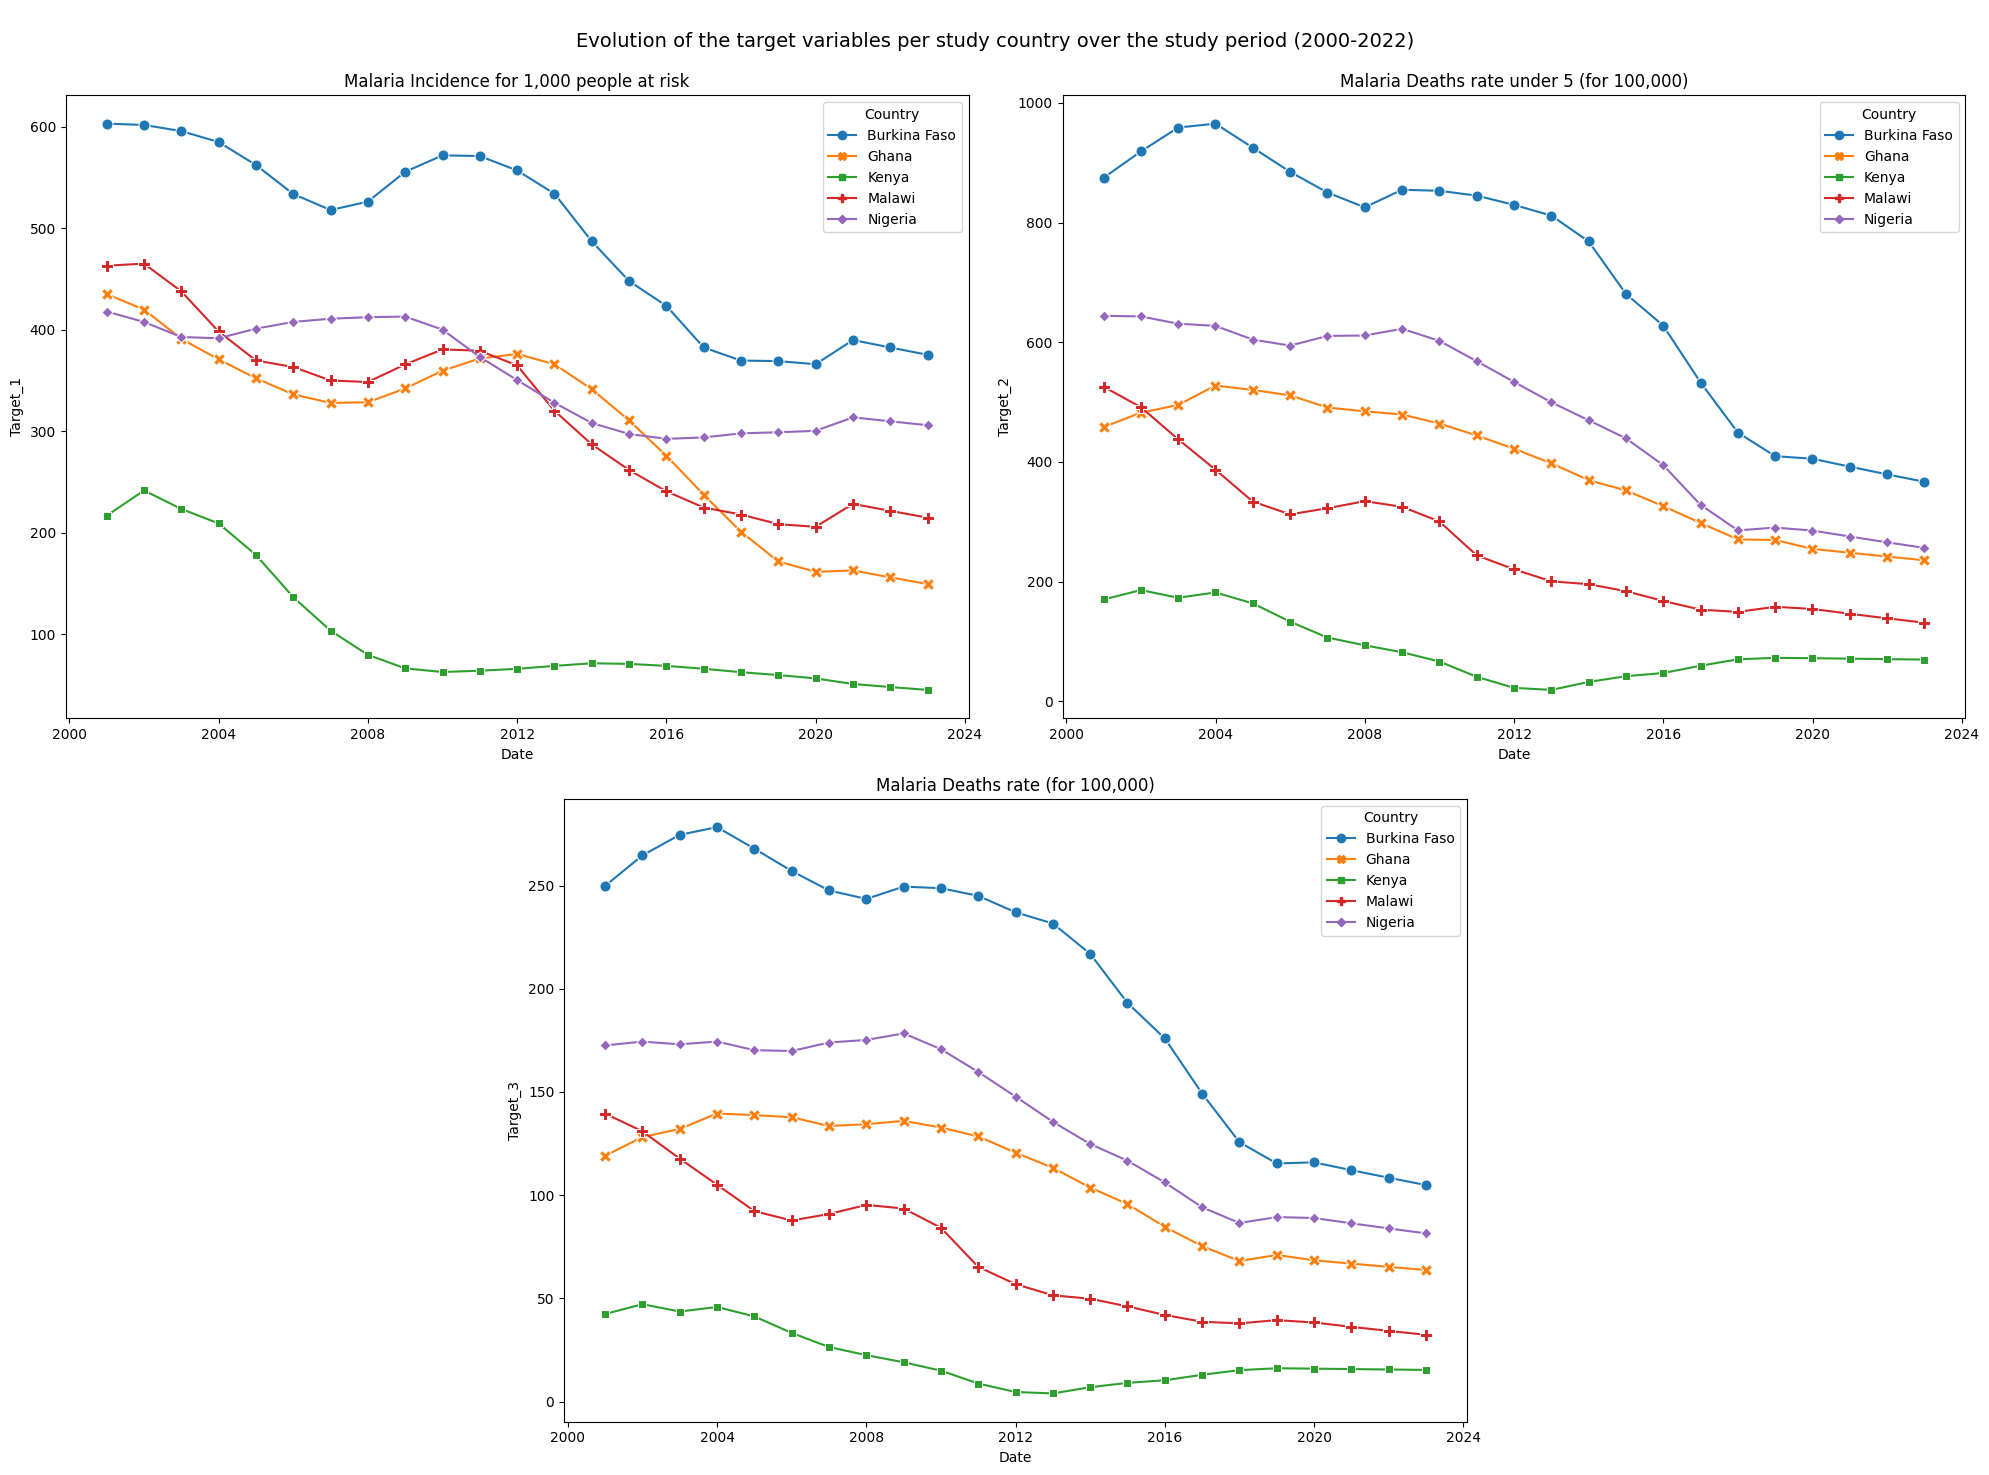

In [33]:
targets_dict = {
    "Target_1": 'Malaria Incidence for 1,000 people at risk',
    "Target_2": 'Malaria Deaths rate under 5 (for 100,000)',
    "Target_3": "Malaria Deaths rate (for 100,000)",
}
plotmaker.evolution_plot_per_country(
    data=data.loc[study_countries].reset_index(),
    country_column="Country",
    x_column="Date",
    variables=list(targets_dict.keys()), 
    nrows=2, 
    ncols=2, 
    figsize=(20, 15), 
    nfigs=3, 
    centered=True, 
    subtitles=list(targets_dict.values()),
    scenario="",
    predictions=False
)

### Target variables summary per country

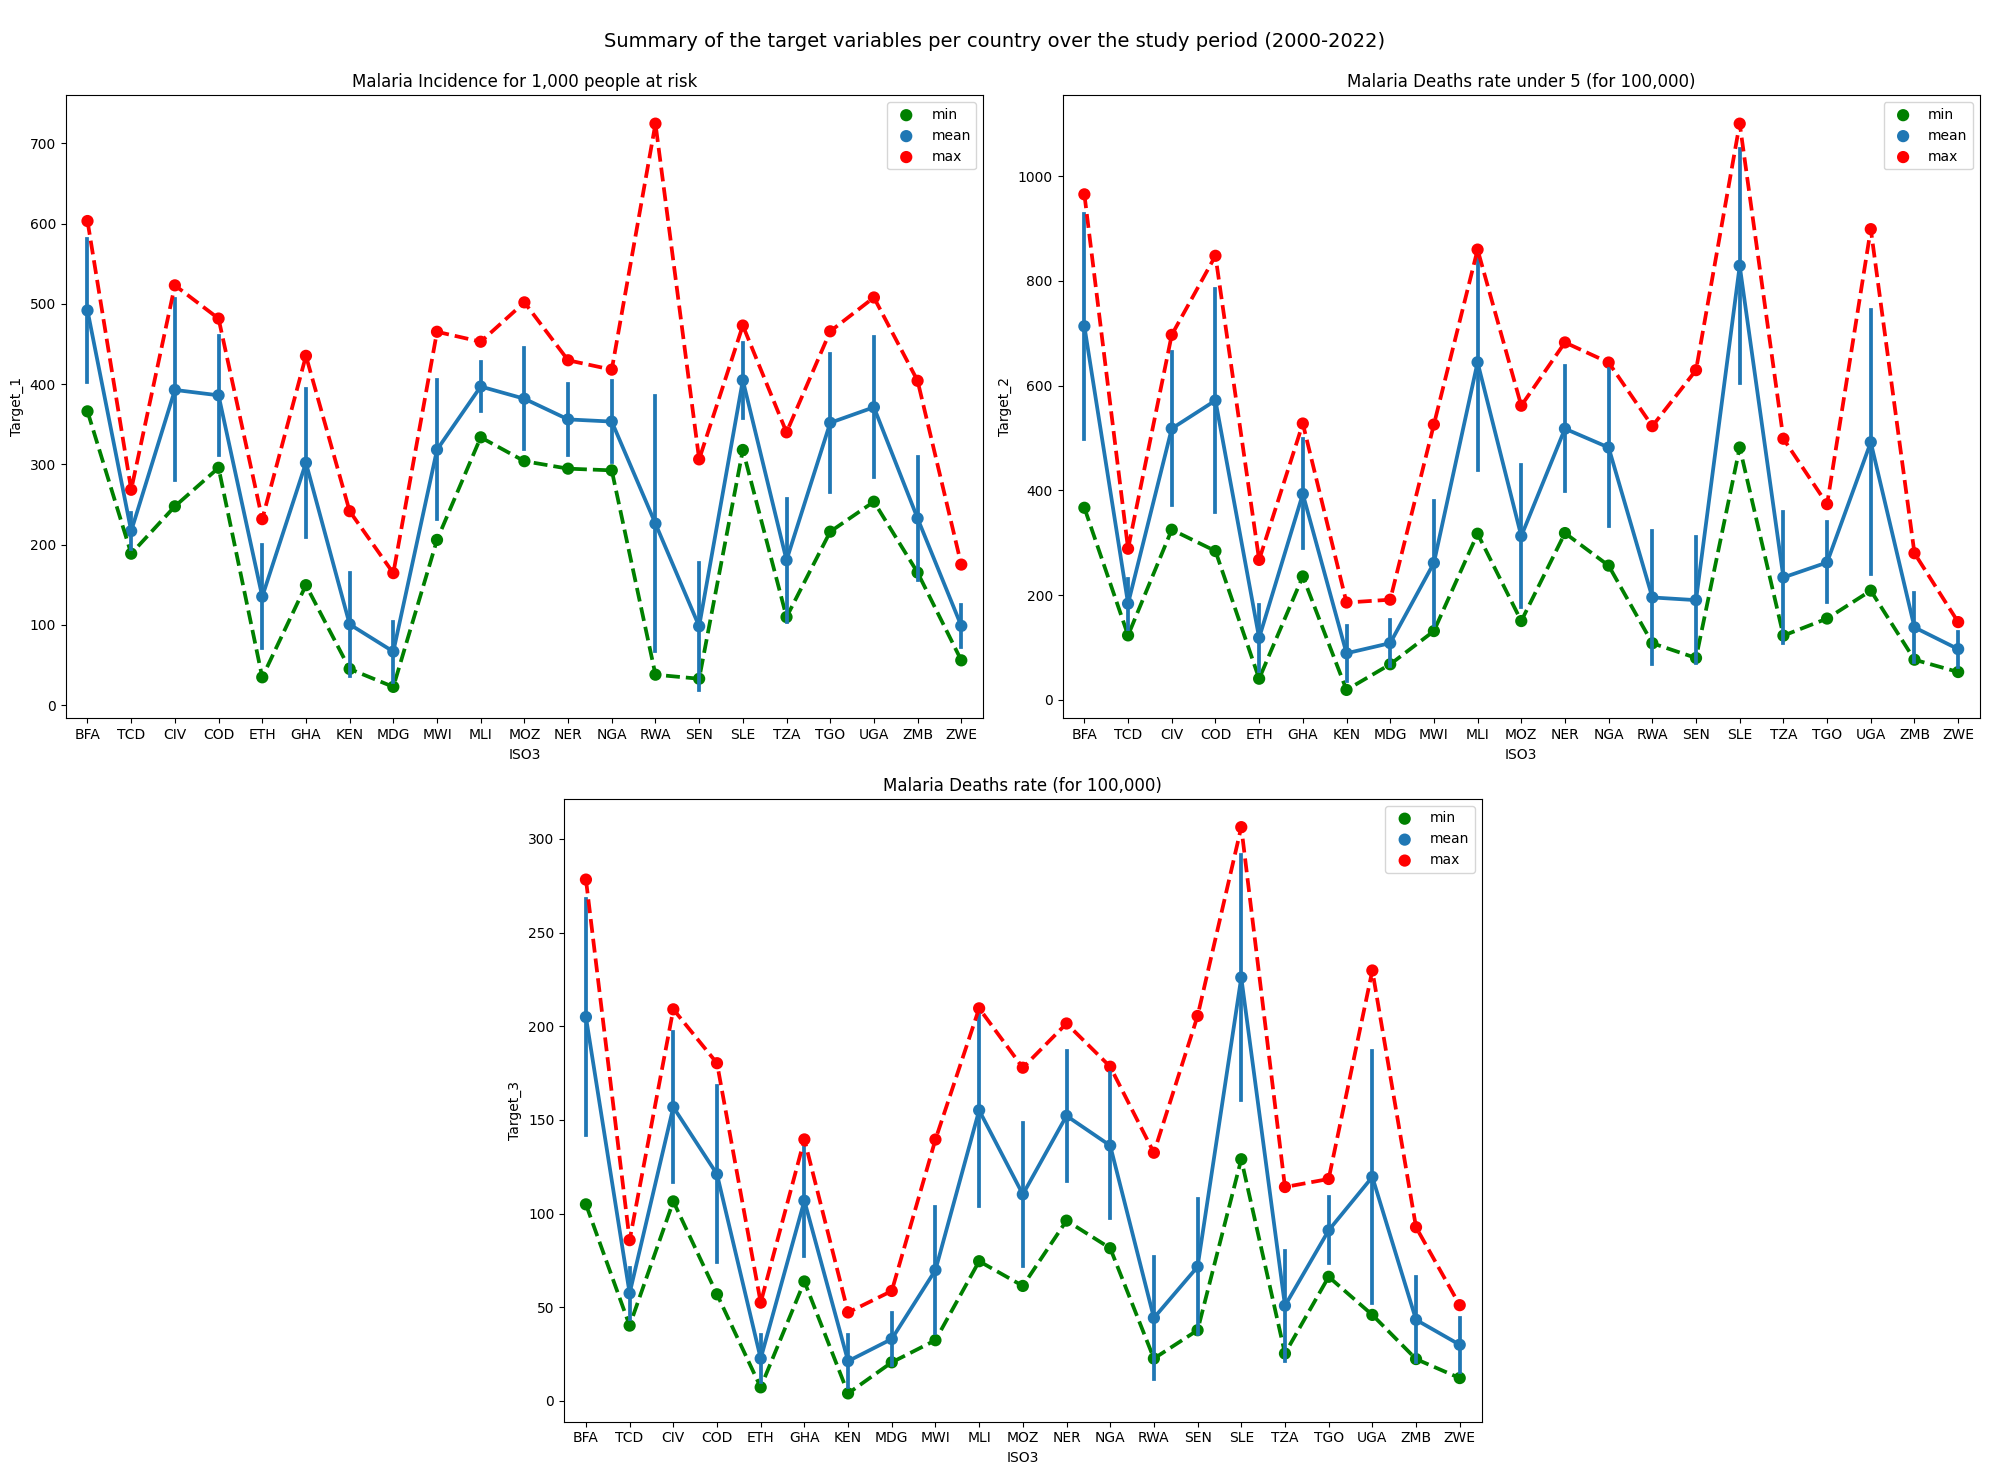

In [34]:
plotmaker.describe_per_country(
    data=data.reset_index(), 
    country_column="ISO3", 
    variables=list(targets_dict.keys()), 
    nrows=2, 
    ncols=2, 
    figsize=(20, 15), 
    nfigs=3, 
    centered=True, 
    subtitles=list(targets_dict.values()),
    target=True
)

### Evolution with Focus on Vaccine Trials

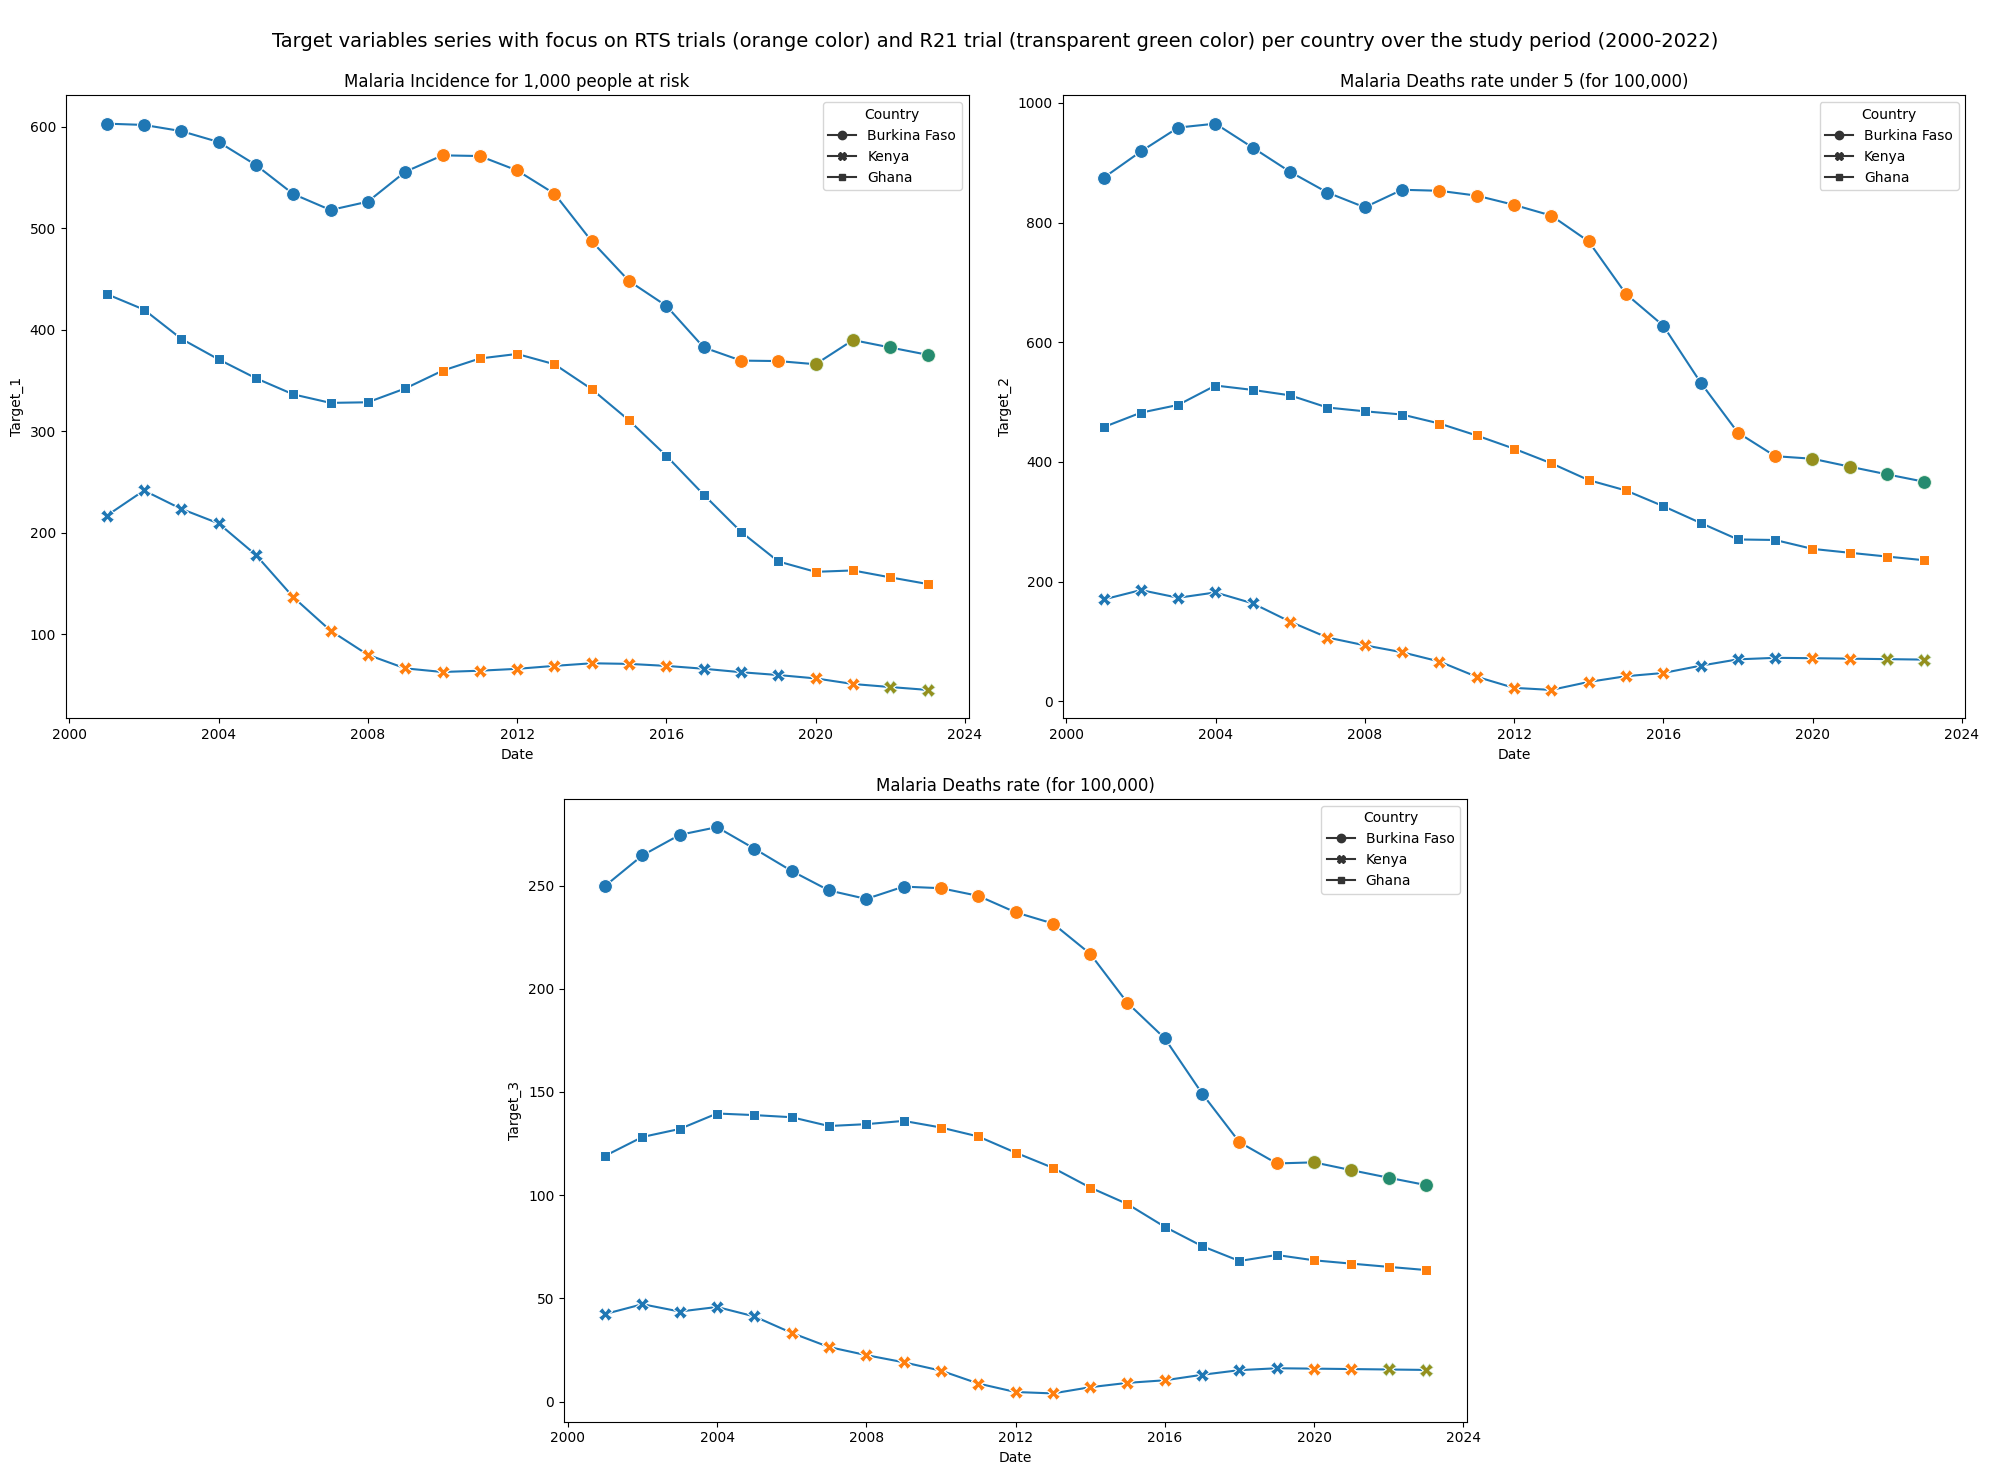

In [35]:
plotmaker.plot_serie_per_country(
    data=data.loc[["Burkina Faso", "Kenya", "Ghana"]].reset_index(), 
    country_column="Country",
    x_columns="Date",
    targets_list=list(targets_dict.keys()), 
    nrows=2, 
    ncols=2, 
    figsize=(20, 15),
    nfigs=3, 
    centered=True, 
    vaccination_focus=True,
    subtitles=list(targets_dict.values())
)

### Relation Targets vs Features

In [36]:
# targets_vs_features = plotmaker.subset_correlation_matrix(data.drop(columns=["Feature_28", "Feature_29", "Feature_30"]).loc["Kenya"], get_target_feat=True, thresholdlow=0.1)

# plotmaker.heatmap_correlation_matrix(
#     targets_vs_features,
#     figtitle="Heatmap Correlation Matrix using Kenya data",
#     figname="heatmap_corr_mat_between_targets_and_features_kenya_dataset",
#     country="Features vs Targets", corr_data=True, not_symmetric=True
# )

### Export data

In [37]:
data.reset_index().to_csv("../data/cleaned/final/cleaned_project_dataset.csv", index=False)